<a id=section1></a>

<a id=section2></a>

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<a id=section3></a>

## 3. Exploratory Data Analysis

In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

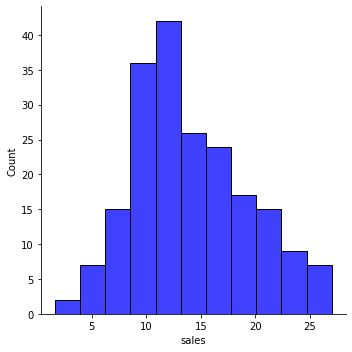

In [6]:
sns.displot(data['sales'], color='b');

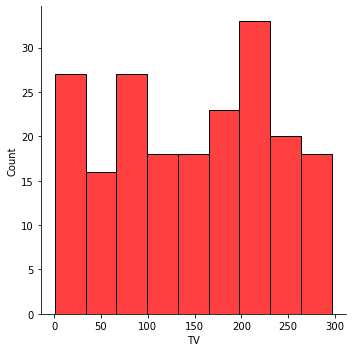

In [7]:
sns.displot(data['TV'], color='r');

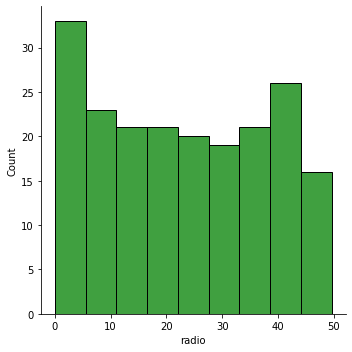

In [8]:
sns.displot(data['radio'], color='g');

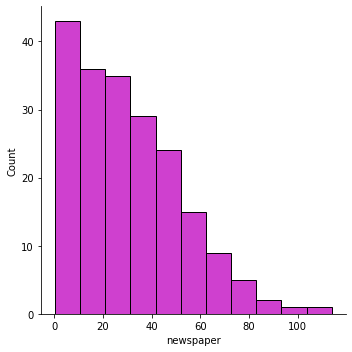

In [9]:
sns.displot(data['newspaper'], color='m');

C:\Users\ingle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingle\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

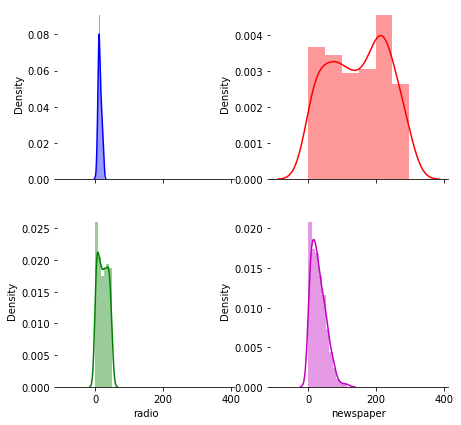

In [10]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])

sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])

### Is there a relationship between sales and spend various advertising channels?

In [11]:
import warnings
warnings.filterwarnings("ignore")

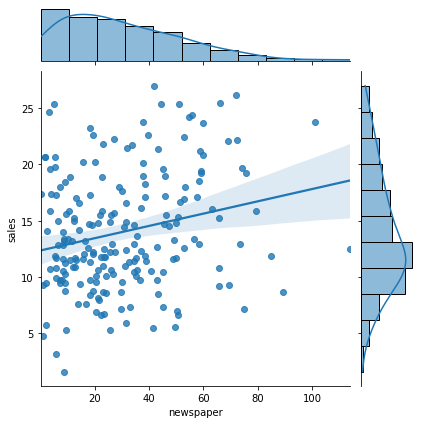

In [12]:
sns.jointplot("newspaper","sales",data=data, kind='reg');

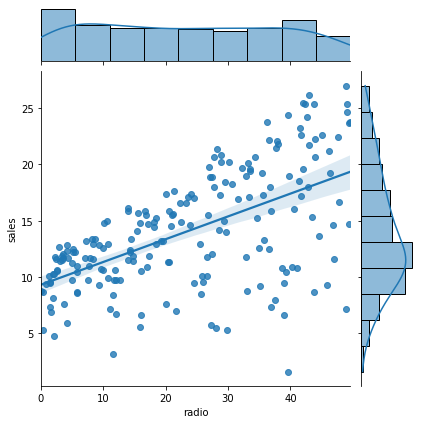

In [13]:
sns.jointplot("radio","sales",data=data, kind='reg');

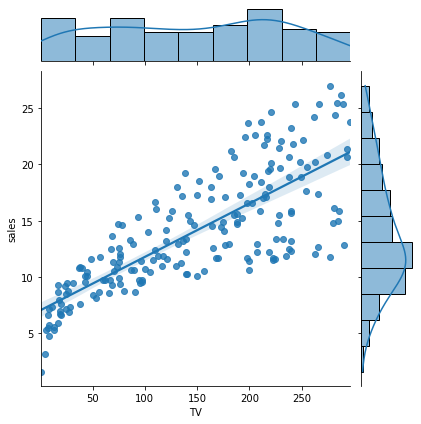

In [14]:
sns.jointplot("TV","sales",data=data, kind='reg');

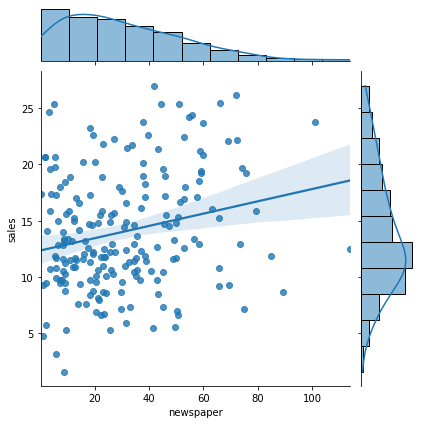

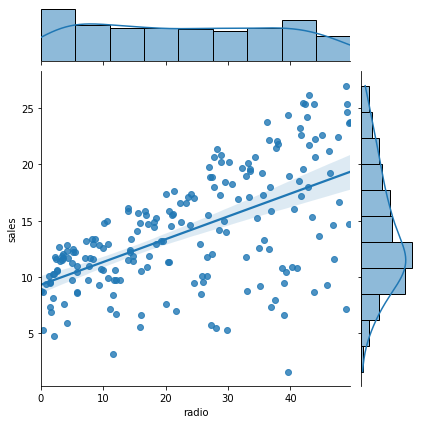

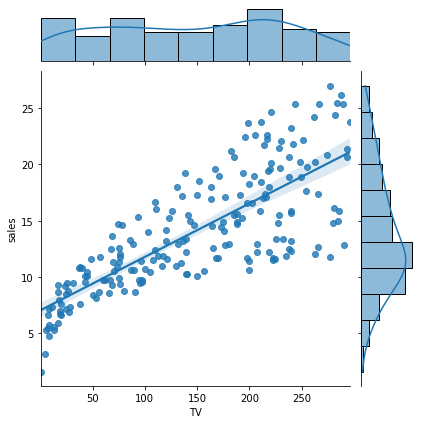

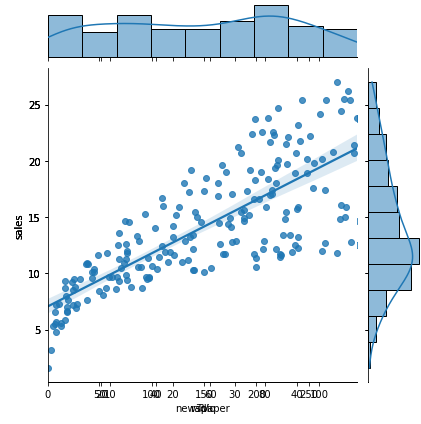

In [15]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

### Visualising Pairwise correlation

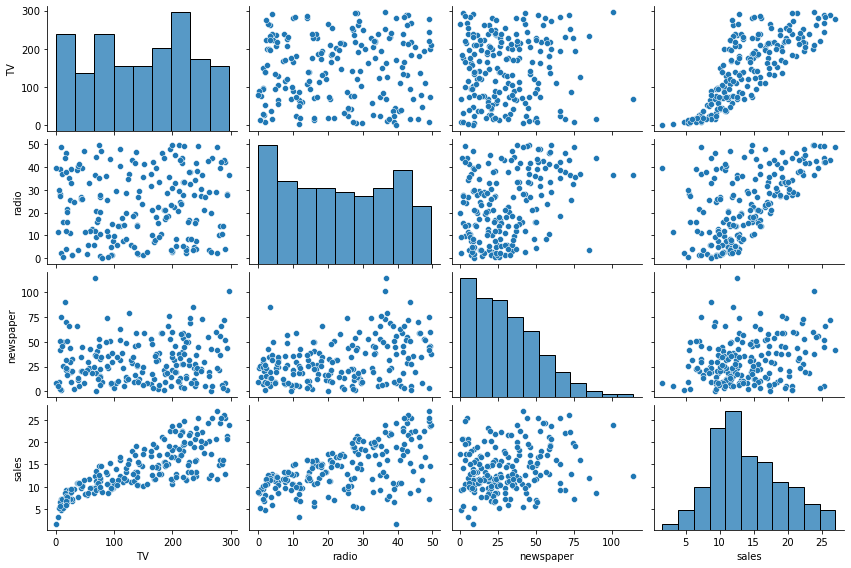

In [16]:
sns.pairplot(data, size = 2, aspect = 1.5)

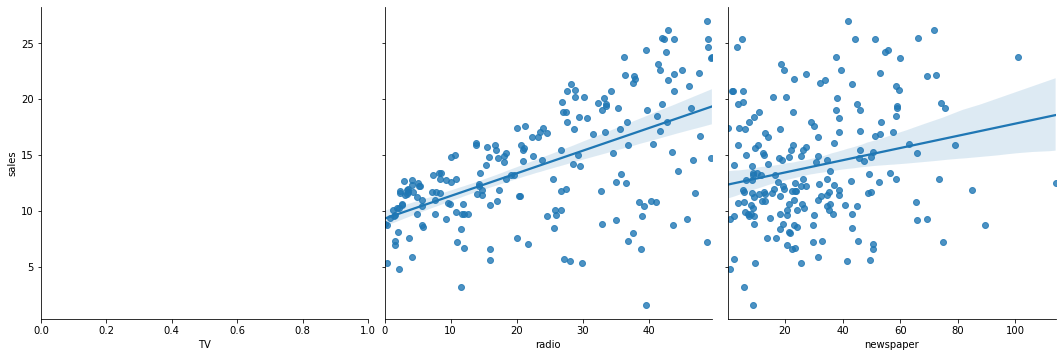

In [17]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg');

### Calculating and plotting heatmap correlation

In [18]:
data.corr();

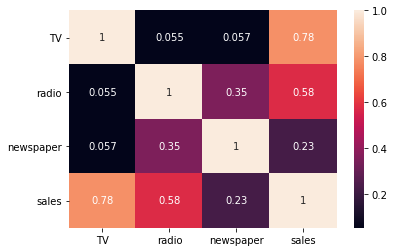

In [19]:
sns.heatmap(data.corr(), annot=True);

<a id=section4></a>

<a id=section401></a>

<a id = sectionassumptions></a>

#### 4.1.1 Assumptions of Linear Regression

In [20]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [21]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<a id=section402></a>

### 4.2 Preparing X and y using pandas

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data[['TV','radio','newspaper','sales']] = scaler.transform(data)

In [23]:
data.head()

,TV,radio,newspaper,sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


In [24]:
# feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
feature_cols = ['TV', 'radio']                # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

In [25]:
X.head()

,TV,radio
1,0.969852,0.981522
2,-1.197376,1.082808
3,-1.516155,1.528463
4,0.052050,1.217855
5,0.394182,-0.841614


In [26]:
X.columns

Index(['TV', 'radio'], dtype='object')

In [27]:
X.shape

(200, 2)

- Checking the type and shape of X.

In [28]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 2)


In [29]:
y = data.sales
y.head()

1    1.552053
2   -0.696046
3   -0.907406
4    0.860330
5   -0.215683
Name: sales, dtype: float64

- Check the type and shape of y

In [30]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [31]:
np.random.rand(3,2)

array([[0.29190558, 0.54767075],
       [0.81634009, 0.35541072],
       [0.23141241, 0.0772    ]])

In [32]:
np.random.seed(0)
np.random.rand(3,2)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411]])

In [33]:
np.random.seed(50)
np.random.rand(3,2)

array([[0.49460165, 0.2280831 ],
       [0.25547392, 0.39632991],
       [0.3773151 , 0.99657423]])

In [34]:
X.head()

,TV,radio
1,0.969852,0.981522
2,-1.197376,1.082808
3,-1.516155,1.528463
4,0.052050,1.217855
5,0.394182,-0.841614


In [35]:
X.tail()

,TV,radio
196,-1.270941,-1.321031
197,-0.617035,-1.240003
198,0.349810,-0.942899
199,1.594565,1.265121
200,0.993206,-0.990165


In [36]:
y.head()

1    1.552053
2   -0.696046
3   -0.907406
4    0.860330
5   -0.215683
Name: sales, dtype: float64

In [37]:
y.tail()

196   -1.234053
197   -0.830548
198   -0.234898
199    2.205347
200   -0.119610
Name: sales, dtype: float64

<a id=section403></a>

### 4.3 Splitting X and y into training and test datasets.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 2)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 2)
y_test shape:  (40,)


In [40]:
X_train.head()

,TV,radio
135,-1.286120,1.035541
67,-1.349176,0.090211
27,-0.048371,0.407572
114,0.730476,-0.179883
169,0.798202,0.022688


In [41]:
y_train.head()

135   -0.619188
67    -0.868977
27     0.187822
114    0.360753
169    0.591327
Name: sales, dtype: float64

In [42]:
X_train.tail()

,TV,radio
68,-0.090408,-0.591776
193,-1.516155,-1.294022
118,-0.824884,-1.516849
48,1.084286,1.231360
173,-1.488130,-0.213645


<a id=section404></a>

### 4.4 Linear regression in scikit-learn

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

<a id=section405></a>

### 4.5 Interpreting Model Coefficients

In [44]:
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)

Intercept: 0.003083468712672531
Coefficients: [0.73252567 0.55548276]


In [45]:
feature_cols

['TV', 'radio']

In [46]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept', 'TV', 'radio']

In [47]:
coef = regressor.coef_.tolist()
coef

[0.7325256699375056, 0.5554827621797982]

In [48]:
coef.insert(0, regressor.intercept_)
coef

[0.003083468712672531, 0.7325256699375056, 0.5554827621797982]

Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [49]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.003083468712672531
TV 0.7325256699375056
radio 0.5554827621797982


<a id=section406></a>

### 4.6 Using the Model for Prediction

In [50]:
y_pred_test = regressor.predict(X_test)

In [51]:
y_pred_train = regressor.predict(X_train)

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

## 5. Model evaluation 

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

In [52]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [53]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.23310610657099673
MAE for test set is 0.26369972028614785


In [54]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [55]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.08897481854291696
MSE for test set is 0.16213066933345258


In [56]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [57]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.29828647059985297
RMSE for test set is 0.40265452851477107


<a id=section502></a>

### 5.2 Model Evaluation using Rsquared value.

In [58]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [59]:
r2_score_train

0.906590009997456

In [60]:
r2_score_test

0.8604541663186569

In [61]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9065900099974561 0.9054000738190797


In [62]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8604541663186569 0.8529111482818276


<a id=section6></a>

<a id=section7></a>